In [4]:
import pandas as pd

# Ruta al archivo CSV
file_path = 'C:/Users/siret/OneDrive/winequality-red.csv'

# Cargar el dataset
data = pd.read_csv(file_path)

# Verificar las primeras filas del dataset
print(data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

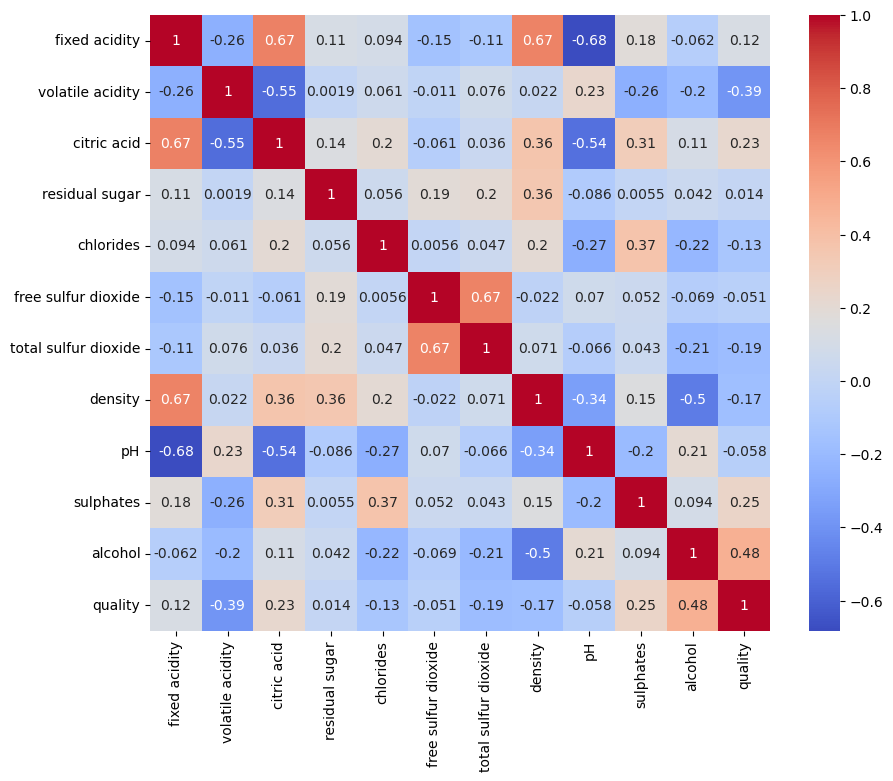

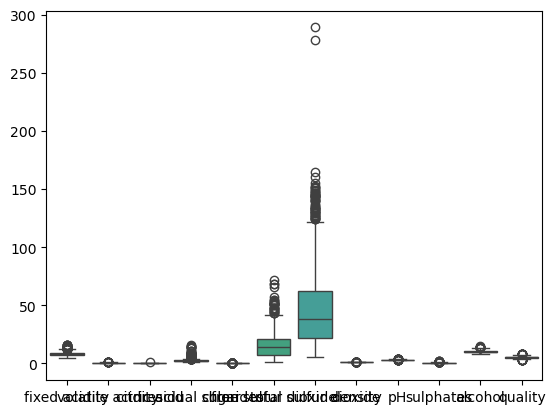

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('C:/Users/siret/OneDrive/winequality-red.csv')

# Ver las primeras filas del dataset
print(data.head())

# Descripción estadística de las variables
print(data.describe())

# Verificar la correlación entre las variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Identificar valores atípicos
sns.boxplot(data=data)
plt.show()


In [6]:
# Verificar valores faltantes
print(data.isnull().sum())

# En este caso, no hay valores faltantes en el dataset, pero si los hubiera:
# data = data.fillna(method='ffill')  # O cualquier otro método de imputación

# Normalizar los datos si es necesario
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las mejores características (aquí tomamos las 5 mejores como ejemplo)
X = data.drop('quality', axis=1)
y = data['quality']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print(f"Características seleccionadas: {selected_features}")


Características seleccionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


In [8]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Entrenamiento del modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, C=1, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Evaluación del modelo
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión Logística - Precisión:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Regresión Logística - Precisión: 0.41041666666666665
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.65      0.21        17
           5       0.65      0.46      0.54       195
           6       0.58      0.33      0.42       200
           7       0.39      0.46      0.42        61
           8       0.06      0.50      0.10         6

    accuracy                           0.41       480
   macro avg       0.30      0.40      0.28       480
weighted avg       0.56      0.41      0.46       480



In [19]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
tree_model.fit(X_train_res, y_train_res)

# Evaluación del modelo
y_pred_tree = tree_model.predict(X_test)
print("Árbol de Decisión - Precisión:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Árbol de Decisión - Precisión: 0.3125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.05      0.47      0.09        17
           5       0.78      0.15      0.25       195
           6       0.50      0.42      0.46       200
           7       0.44      0.41      0.42        61
           8       0.08      0.50      0.14         6

    accuracy                           0.31       480
   macro avg       0.31      0.33      0.23       480
weighted avg       0.58      0.31      0.35       480



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Entrenamiento del modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_res, y_train_res)

# Evaluación del modelo
y_pred_lin_reg = lin_reg.predict(X_test)
print("Regresión Lineal - R^2:", lin_reg.score(X_test, y_test))
print("Regresión Lineal - MSE:", mean_squared_error(y_test, y_pred_lin_reg))


Regresión Lineal - R^2: -0.2823755892778721
Regresión Lineal - MSE: 0.8130561792800447


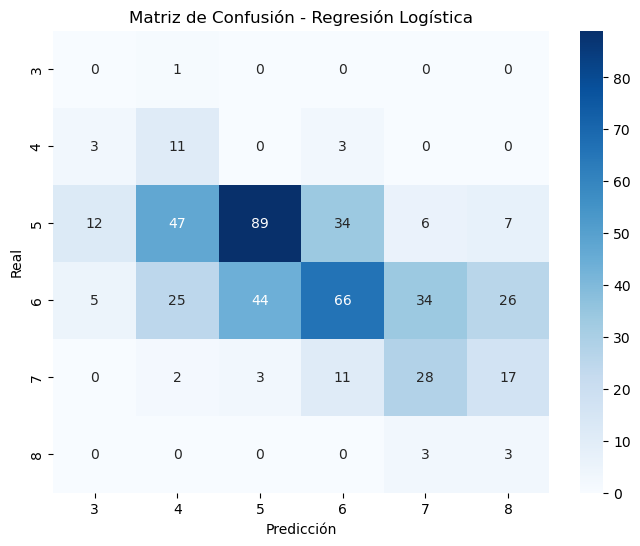

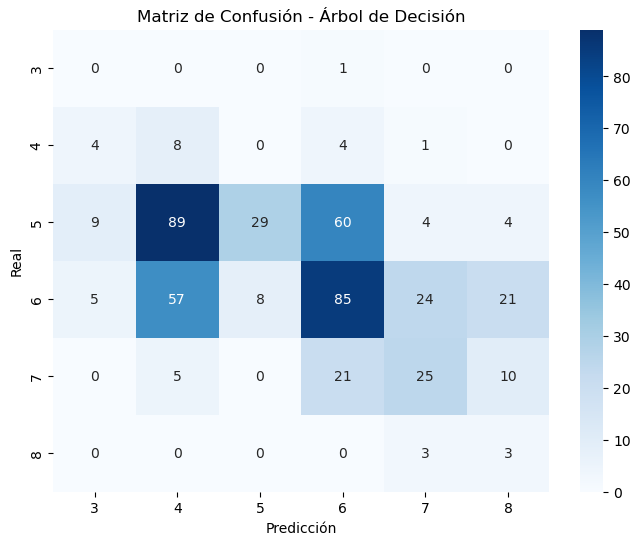

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Graficar la matriz de confusión para Regresión Logística
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 9), yticklabels=range(3, 9))
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Graficar la matriz de confusión para Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 9), yticklabels=range(3, 9))
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
